<a href="https://colab.research.google.com/github/jihun5/data-preprocessing_/blob/main/%EC%8B%9C%EA%B3%84%EC%97%B4_%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

dat_df = pd.read_csv('energydata.csv', sep=',')
dat_df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5
0,2016-01-11 17:00:00,60.0,30.0,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09
3,2016-01-11 17:30:00,50.0,40.0,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09


In [2]:
print(dat_df.shape)

(10628, 13)


In [3]:
print(dat_df.dtypes)

date           object
Appliances    float64
lights        float64
T1            float64
RH_1          float64
T2            float64
RH_2          float64
T3            float64
RH_3          float64
T4            float64
RH_4          float64
T5            float64
RH_5          float64
dtype: object


In [4]:
# datetime 형으토 데이터 변환
dat_df['date'] = pd.to_datetime(dat_df['date'], format='%Y-%m-%d %H:%M:%S')
print(dat_df['date'].dtype)
print(type(dat_df['date'][0]))

datetime64[ns]
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [5]:
# 한 행 전과의 시간차 계산
dat_df['dif_min'] = dat_df['date'].diff().dt.total_seconds()/60
dat_df['dif_min'] = dat_df['dif_min'].fillna(0)
dat_df['dif_min'].head()

0     0.0
1    10.0
2    10.0
3    10.0
4    10.0
Name: dif_min, dtype: float64

In [6]:
# 경과 시간 계산(분)
dat_df['cum_min'] = dat_df['dif_min'].cumsum()
dat_df[['date', 'cum_min']].head()

,date,cum_min
0,2016-01-11 17:00:00,0.0
1,2016-01-11 17:10:00,10.0
2,2016-01-11 17:20:00,20.0
3,2016-01-11 17:30:00,30.0
4,2016-01-11 17:40:00,40.0


In [7]:
# 경과 시간 분을 이용해 시를 계산하기
dat_df ['cum_hour'] = (dat_df['cum_min']/60).round(2).astype(int)
dat_df[['date', 'cum_min', 'cum_hour']].head(10)

,date,cum_min,cum_hour
0,2016-01-11 17:00:00,0.0,0
1,2016-01-11 17:10:00,10.0,0
2,2016-01-11 17:20:00,20.0,0
3,2016-01-11 17:30:00,30.0,0
4,2016-01-11 17:40:00,40.0,0
5,2016-01-11 17:50:00,50.0,0
6,2016-01-11 18:00:00,60.0,1
7,2016-01-11 18:10:00,70.0,1
8,2016-01-11 18:20:00,80.0,1
9,2016-01-11 18:30:00,90.0,1


In [8]:
# 결측치 확인
print(dat_df.isnull().sum(axis=1).sort_values(ascending=False))
print(dat_df.isnull().sum(axis=0))

10627    12
8604      1
8586      1
9699      1
7081      0
         ..
3543      0
3544      0
3545      0
3546      0
5314      0
Length: 10628, dtype: int64
date          0
Appliances    1
lights        1
T1            1
RH_1          1
T2            1
RH_2          2
T3            2
RH_3          1
T4            1
RH_4          1
T5            2
RH_5          1
dif_min       0
cum_min       0
cum_hour      0
dtype: int64


In [9]:
# 각 항목의 통계량 계산
dat_df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,dif_min,cum_min,cum_hour
count,10627.000000,10627.000000,10627.000000,10627.000000,10627.000000,10626.000000,10626.000000,10627.000000,10627.000000,10627.000000,10626.000000,10627.000000,10628.000000,10628.000000,10628.000000
mean,97.787711,5.193375,20.778734,40.174855,19.353723,40.380065,20.905463,40.041134,19.605549,39.365049,18.348276,52.421534,-1.450884,53123.550056,884.975913
std,107.414339,9.140957,1.231449,3.821670,1.433370,3.184966,1.188341,3.464197,1.423000,4.733269,1.064940,9.328821,1180.399770,30684.711888,511.411766
min,10.000000,0.000000,16.790000,31.426667,16.100000,30.160000,17.200000,32.626667,15.100000,30.723333,15.330000,37.400000,-121680.000000,-15420.000000,-257.000000
25%,50.000000,0.000000,20.000000,37.156667,18.323333,38.200000,20.166667,37.090000,18.790000,35.433333,17.700000,46.287500,10.000000,26557.500000,442.000000
50%,60.000000,0.000000,20.890000,39.633333,19.323333,40.400000,20.890000,39.500000,19.700000,38.200000,18.390000,50.745000,10.000000,53125.000000,885.000000
75%,100.000000,10.000000,21.600000,43.326667,20.356667,42.760000,21.760000,43.290000,20.600000,43.400000,19.000000,55.234808,10.000000,79692.500000,1328.000000
max,1080.000000,70.000000,24.100000,63.360000,23.600000,50.260000,25.500000,50.163333,23.760000,51.090000,22.967778,96.321667,10.000000,106260.000000,1771.000000


In [10]:
# 시간별로 평균치와 표준편차 계산
dat_df.groupby('cum_hour').mean()
dat_df.groupby('cum_hour').std()

<ipython-input-10-d78a90c48143>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dat_df.groupby('cum_hour').mean()
<ipython-input-10-d78a90c48143>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dat_df.groupby('cum_hour').std()


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,dif_min,cum_min
cum_hour,,,,,,,,,,,,,,
-257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,5.477226,5.477226,0.000000,0.586449,0.000000,0.111888,0.000000,0.112421,0.053972,0.179315,0.021082,0.068605,4.082483,18.708287
1,208.678381,11.690452,0.094249,0.318235,0.098334,0.049065,0.030984,0.046380,0.044907,0.303102,0.027217,0.040369,0.000000,18.708287
2,141.515606,17.606817,0.276355,2.629391,0.251738,1.145478,0.140676,1.626932,0.048736,0.875112,0.042709,0.746929,0.000000,18.708287
3,37.282704,8.366600,0.089086,1.753466,0.064141,0.505110,0.050527,0.573855,0.166626,0.602464,0.276379,8.971516,0.000000,18.708287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,101.521755,5.163978,0.000000,0.128975,0.000000,0.071513,0.097472,0.137367,0.044305,0.090029,0.036515,0.174234,0.000000,18.708287
1768,176.455849,0.000000,0.056804,0.185971,0.000000,0.211078,0.000000,0.052043,0.024495,0.177276,0.013608,0.138121,0.000000,18.708287
1769,143.026804,0.000000,0.056804,0.090848,0.024368,0.072745,0.054992,0.050096,0.044244,0.034539,0.000000,0.154114,0.000000,18.708287


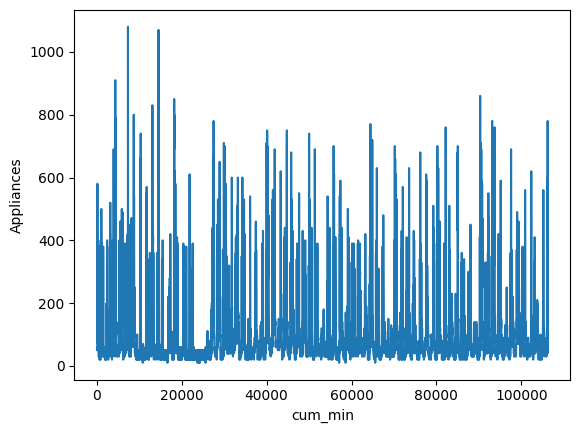

In [11]:
# 데이터 시각화
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(dat_df['cum_min'], dat_df['Appliances'])
plt.xlabel('cum_min')
plt.ylabel('Appliances')
plt.show()

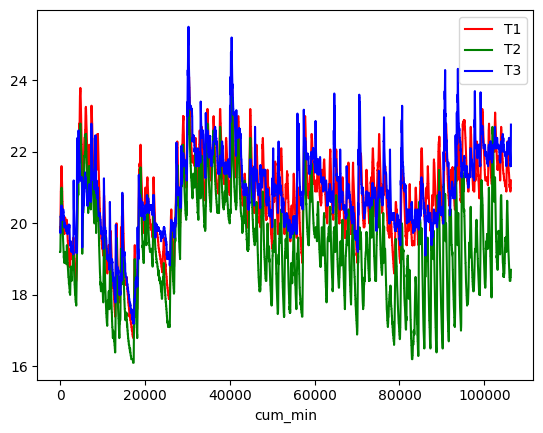

In [12]:
# 부엌온도, 거실온도, 세탁실온도 꺾은선 그래프를 그리시오
plt.plot(dat_df['cum_min'], dat_df['T1'], '-r', label='T1')
plt.plot(dat_df['cum_min'], dat_df['T2'], '-g', label='T2')
plt.plot(dat_df['cum_min'], dat_df['T3'], '-b', label='T3')
plt.xlabel('cum_min')
plt.legend()
plt.show()

In [13]:
# 데이터 읽기
dat_df = pd.read_csv('energydata.csv', sep=',')
dat_df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5
0,2016-01-11 17:00:00,60.0,30.0,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09
3,2016-01-11 17:30:00,50.0,40.0,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09


In [14]:
# 결손값 표시
dat_df[8585:8588]

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5
8585,2016-03-11 07:50:00,70.0,0.0,20.2,37.160000,16.5,42.430000,20.39,37.500000,19.700000,34.360000,18.000000,46.660000
8586,2016-03-11 08:00:00,280.0,0.0,20.2,37.463333,16.6,42.766667,NaN,37.500000,19.700000,34.633333,18.066667,46.193333
8587,2016-03-11 08:10:00,180.0,10.0,20.2,37.530000,16.6,42.966667,20.29,37.363333,19.666667,34.723333,18.100000,45.723333


In [15]:
# method='ffill'로 전행의 값 대입
dat_df[8585:8588].fillna(method='ffill')

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5
8585,2016-03-11 07:50:00,70.0,0.0,20.2,37.160000,16.5,42.430000,20.39,37.500000,19.700000,34.360000,18.000000,46.660000
8586,2016-03-11 08:00:00,280.0,0.0,20.2,37.463333,16.6,42.766667,20.39,37.500000,19.700000,34.633333,18.066667,46.193333
8587,2016-03-11 08:10:00,180.0,10.0,20.2,37.530000,16.6,42.966667,20.29,37.363333,19.666667,34.723333,18.100000,45.723333


In [16]:
# 전후의 값 평균치로 보완하는 결손값
dat_df = dat_df.interpolate()
dat_df[8585:8588]

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5
8585,2016-03-11 07:50:00,70.0,0.0,20.2,37.160000,16.5,42.430000,20.39,37.500000,19.700000,34.360000,18.000000,46.660000
8586,2016-03-11 08:00:00,280.0,0.0,20.2,37.463333,16.6,42.766667,20.34,37.500000,19.700000,34.633333,18.066667,46.193333
8587,2016-03-11 08:10:00,180.0,10.0,20.2,37.530000,16.6,42.966667,20.29,37.363333,19.666667,34.723333,18.100000,45.723333


In [17]:
# 분석 목표 = 6시간 마다 전력소비량의 이상을 검출
# 시간축 작성
# 경과시간(분) 계산
dat_df['date'] = pd.to_datetime(dat_df['date'], format='%Y-%m-%d %H:%M:%S')
dat_df['dif_min'] = dat_df['date'].diff().dt.total_seconds()/60
dat_df['dif_min'] = dat_df['dif_min'].fillna(0)
dat_df['cum_min'] = dat_df['dif_min'].cumsum()
dat_df[['date', 'cum_min']].head()

,date,cum_min
0,2016-01-11 17:00:00,0.0
1,2016-01-11 17:10:00,10.0
2,2016-01-11 17:20:00,20.0
3,2016-01-11 17:30:00,30.0
4,2016-01-11 17:40:00,40.0


In [19]:
# 경과시간 6시간 단위를 계산하시오
dat_df['cum_6hour'] = (dat_df['cum_min']/360).round(2).astype(int)
print(dat_df['cum_6hour'].unique())
print(dat_df[['date', 'cum_min', 'cum_6hour']].head(50))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [20]:
# 6시간 단위로 만들기 위한 평균치 계산
dat_df = dat_df.drop(['date', 'dif_min', 'cum_min'], axis=1)
dat_df_mean = dat_df.groupby('cum_6hour').mean()

print(dat_df_mean.shape)
dat_df_mean.head()

(297, 12)


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5
cum_6hour,,,,,,,,,,,,
-42,290.000000,0.000000,21.200000,42.860000,18.700000,46.100000,22.763333,40.626667,19.700000,39.700000,19.200000,47.730000
0,150.000000,31.944444,20.688056,47.345394,20.023148,44.973287,20.111481,46.041875,19.255972,47.379074,17.761597,60.359861
1,81.944444,7.222222,20.858287,45.627708,20.227315,44.286435,20.213588,45.530833,20.740093,46.503634,18.898519,50.261273
2,83.333333,5.555556,19.860463,47.019213,19.140608,44.876698,20.149722,45.269306,19.349259,45.893611,18.163125,50.817454
3,101.111111,0.000000,20.037500,44.843009,19.103377,43.495476,19.907778,44.802407,19.748287,43.536204,17.835370,50.444111


In [21]:
#
dat_df_std = dat_df.groupby('cum_6hour').std()
print(dat_df_std.shape)
dat_df_std.head()

(297, 12)


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5
cum_6hour,,,,,,,,,,,,
-42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,131.366445,13.901582,0.672443,2.998070,0.653222,0.848637,0.278809,1.185530,0.485747,1.282966,0.791008,9.891611
1,101.497908,9.137399,0.460572,0.811346,0.476669,0.342190,0.082826,0.103003,0.560148,0.511257,0.272610,0.339389
2,104.853639,9.085135,0.103157,1.039938,0.167655,0.318816,0.142110,0.261039,0.273491,0.776746,0.178471,1.138170
3,95.999339,0.000000,0.059026,1.091231,0.069944,0.617057,0.046289,0.068936,0.274278,0.622986,0.164863,0.792715


In [26]:
#
import numpy as np
hid = dat_df['cum_6hour'].unique()
dat_slide_features = []

for i in range(len(hid)):
    tmp = dat_df[dat_df['cum_6hour'] == i]
    tmp = tmp.drop(['cum_6hour'], axis=1)

    tmp_mean = tmp.rolling(6).mean()
    tmp_mean = tmp_mean.dropna()
    tmp_std = tmp.rolling(6).mean()
    tmp_std = tmp_std.dropna()

    tmp2 = (np.array(tmp_mean['Appliances']).tolist() + np.array(tmp_mean['lights']).tolist() +
            np.array(tmp_mean['T1']).tolist() + np.array(tmp_mean['RH_1']).tolist() +
            np.array(tmp_mean['T2']).tolist() + np.array(tmp_mean['RH_2']).tolist() +
            np.array(tmp_mean['T3']).tolist() + np.array(tmp_mean['RH_3']).tolist() +
            np.array(tmp_mean['T4']).tolist() + np.array(tmp_mean['RH_4']).tolist() +
            np.array(tmp_mean['T5']).tolist() + np.array(tmp_mean['RH_5']).tolist() +
            np.array(tmp_std['Appliances']).tolist() + np.array(tmp_std['lights']).tolist() +
            np.array(tmp_std['T1']).tolist() + np.array(tmp_std['RH_1']).tolist() +
            np.array(tmp_std['T2']).tolist() + np.array(tmp_std['RH_2']).tolist() +
            np.array(tmp_std['T3']).tolist() + np.array(tmp_std['RH_3']).tolist() +
            np.array(tmp_std['T4']).tolist() + np.array(tmp_std['RH_4']).tolist() +
            np.array(tmp_std['T5']).tolist() + np.array(tmp_std['RH_5']).tolist())
    dat_slide_features.append(tmp2)

In [27]:
dat_slide_features = pd.DataFrame(dat_slide_features)
print(dat_slide_features.shape)
dat_slide_features.head()

(297, 744)


,0,1,2,3,4,5,6,7,8,9,...,734,735,736,737,738,739,740,741,742,743
0,55.000000,55.000000,55.000000,56.666667,60.000000,88.333333,176.666667,238.333333,270.000000,276.666667,...,78.903333,76.020000,72.648889,69.037778,64.516667,59.767222,56.830000,55.170417,53.997083,53.129306
1,56.666667,53.333333,48.333333,46.666667,43.333333,85.000000,141.666667,198.333333,255.000000,268.333333,...,50.090000,50.080000,50.065000,50.050000,50.035000,50.020000,50.005000,50.000000,50.000000,50.000000
2,43.333333,43.333333,46.666667,46.666667,45.000000,41.666667,40.000000,38.333333,35.000000,38.333333,...,52.633333,52.572222,52.305556,51.950000,51.473333,50.951111,50.407778,49.995556,49.783333,49.640000
3,55.000000,56.666667,80.000000,108.333333,126.666667,181.666667,186.666667,186.666667,203.333333,188.333333,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.010000,51.010000,51.010000,51.004444,50.987778
4,218.333333,221.666667,226.666667,203.333333,146.666667,91.666667,58.333333,53.333333,46.666667,45.000000,...,50.601111,50.536111,50.481111,50.437222,50.397222,50.362222,50.338889,50.350000,50.371667,50.427778


In [28]:
# 두 개의 데이터 세트 결합
dat_features = pd.merge(dat_df_mean, dat_df_std, left_index=True, right_index=True)
print(dat_features.shape)
dat_features.head()

(297, 24)


,Appliances_x,lights_x,T1_x,RH_1_x,T2_x,RH_2_x,T3_x,RH_3_x,T4_x,RH_4_x,...,T1_y,RH_1_y,T2_y,RH_2_y,T3_y,RH_3_y,T4_y,RH_4_y,T5_y,RH_5_y
cum_6hour,,,,,,,,,,,,,,,,,,,,,
-42,290.000000,0.000000,21.200000,42.860000,18.700000,46.100000,22.763333,40.626667,19.700000,39.700000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,150.000000,31.944444,20.688056,47.345394,20.023148,44.973287,20.111481,46.041875,19.255972,47.379074,...,0.672443,2.998070,0.653222,0.848637,0.278809,1.185530,0.485747,1.282966,0.791008,9.891611
1,81.944444,7.222222,20.858287,45.627708,20.227315,44.286435,20.213588,45.530833,20.740093,46.503634,...,0.460572,0.811346,0.476669,0.342190,0.082826,0.103003,0.560148,0.511257,0.272610,0.339389
2,83.333333,5.555556,19.860463,47.019213,19.140608,44.876698,20.149722,45.269306,19.349259,45.893611,...,0.103157,1.039938,0.167655,0.318816,0.142110,0.261039,0.273491,0.776746,0.178471,1.138170
3,101.111111,0.000000,20.037500,44.843009,19.103377,43.495476,19.907778,44.802407,19.748287,43.536204,...,0.059026,1.091231,0.069944,0.617057,0.046289,0.068936,0.274278,0.622986,0.164863,0.792715


In [29]:
# 목적변수 작성
event_df = pd.read_csv('event.csv', sep=',')
event_df.head()

,date
0,2016-01-12 10:00:00
1,2016-01-13 21:00:00
2,2016-01-14 10:00:00
3,2016-01-14 16:00:00
4,2016-01-14 17:00:00


In [30]:
# 데이터 집약 및 시간 축 작성
import datetime as dt

event_df['date'] = pd.to_datetime(event_df['date'], format="%Y-%m-%d %H:%M:%S")
base_time = '2016-01-11 17:00:00'
event_df['dif_min'] = event_df['date'] - dt.datetime.strptime(base_time, '%Y-%m-%d %H:%M:%S')
event_df['dif_min'] = event_df['dif_min'].dt.total_seconds()/60
event_df['cum_6hour'] = (event_df['dif_min']/360).round(2).astype(int)
event_df.head()

,date,dif_min,cum_6hour
0,2016-01-12 10:00:00,1020.0,2
1,2016-01-13 21:00:00,3120.0,8
2,2016-01-14 10:00:00,3900.0,10
3,2016-01-14 16:00:00,4260.0,11
4,2016-01-14 17:00:00,4320.0,12


In [31]:
# 데이터 집약 및 시간 축 작성
event_df['event'] = 1
event_df = event_df[['cum_6hour', 'event']]
event_df = event_df[~event_df.duplicated()]
event_df = event_df.set_index(['cum_6hour'])
event_df.head()

,event
cum_6hour,
2,1
8,1
10,1
11,1
12,1


In [32]:
# 특징량과 목적 변수 결합
dat_event = dat_features.join(event_df, how='left')
dat_event = dat_event.fillna(0)

print(dat_event.shape)
dat_event.head()

(297, 25)


,Appliances_x,lights_x,T1_x,RH_1_x,T2_x,RH_2_x,T3_x,RH_3_x,T4_x,RH_4_x,...,RH_1_y,T2_y,RH_2_y,T3_y,RH_3_y,T4_y,RH_4_y,T5_y,RH_5_y,event
cum_6hour,,,,,,,,,,,,,,,,,,,,,
-42,290.000000,0.000000,21.200000,42.860000,18.700000,46.100000,22.763333,40.626667,19.700000,39.700000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
0,150.000000,31.944444,20.688056,47.345394,20.023148,44.973287,20.111481,46.041875,19.255972,47.379074,...,2.998070,0.653222,0.848637,0.278809,1.185530,0.485747,1.282966,0.791008,9.891611,0.0
1,81.944444,7.222222,20.858287,45.627708,20.227315,44.286435,20.213588,45.530833,20.740093,46.503634,...,0.811346,0.476669,0.342190,0.082826,0.103003,0.560148,0.511257,0.272610,0.339389,0.0
2,83.333333,5.555556,19.860463,47.019213,19.140608,44.876698,20.149722,45.269306,19.349259,45.893611,...,1.039938,0.167655,0.318816,0.142110,0.261039,0.273491,0.776746,0.178471,1.138170,1.0
3,101.111111,0.000000,20.037500,44.843009,19.103377,43.495476,19.907778,44.802407,19.748287,43.536204,...,1.091231,0.069944,0.617057,0.046289,0.068936,0.274278,0.622986,0.164863,0.792715,0.0


In [33]:
# 슬라이드 창을 사용한 특징량 추출
tmp = dat_df[dat_df['cum_6hour'] == 0]
tmp = tmp.drop(['cum_6hour'], axis=1)

tmp = tmp.rolling(6).mean()
tmp = tmp.dropna()
tmp

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5
5,55.000000,35.000000,19.890000,46.502778,19.200000,44.626528,19.790000,44.897778,18.932778,45.738750,17.166667,55.116667
6,55.000000,38.333333,19.890000,46.197778,19.200000,44.578194,19.790000,44.926111,18.914444,45.775972,17.155556,55.077778
7,55.000000,41.666667,19.884444,46.008889,19.200000,44.541111,19.780000,44.944444,18.896111,45.754444,17.144444,55.027778
8,56.666667,43.333333,19.867778,45.891806,19.200000,44.508889,19.770000,44.920556,18.890000,45.737778,17.144444,55.012778
9,60.000000,43.333333,19.862222,45.895694,19.205000,44.477222,19.770000,44.897778,18.890000,45.800000,17.133333,54.997778
10,88.333333,48.333333,19.868333,45.817361,19.231111,44.455556,19.770000,44.881111,18.890000,45.950000,17.116667,54.982778
11,176.666667,51.666667,19.897778,45.879028,19.268889,44.438889,19.770000,44.863333,18.908333,46.066667,17.111111,54.977778
12,238.333333,51.666667,19.938333,46.251250,19.330000,44.422222,19.786667,44.863333,18.926667,46.162222,17.111111,54.998333
13,270.000000,50.000000,20.005556,47.445694,19.418333,44.522222,19.813333,44.962222,18.945000,46.388889,17.111111,55.042222
14,276.666667,45.000000,20.111667,49.161667,19.527778,44.755556,19.863889,45.418333,18.963333,46.873333,17.100000,55.125556


In [34]:
# 머신러닝 알고리즘 형태로 특징량 변형
tmp2 = (np.array(tmp['Appliances']).tolist() + np.array(tmp['lights']).tolist() +
        np.array(tmp['T1']).tolist() + np.array(tmp['RH_1']).tolist() +
        np.array(tmp['T2']).tolist() + np.array(tmp['RH_2']).tolist() +
        np.array(tmp['T3']).tolist() + np.array(tmp['RH_3']).tolist() +
        np.array(tmp['T4']).tolist() + np.array(tmp['RH_4']).tolist() +
        np.array(tmp['T5']).tolist() + np.array(tmp['RH_5']).tolist())
print(len(tmp2))
pd.DataFrame(tmp2).T

372


,0,1,2,3,4,5,6,7,8,9,...,362,363,364,365,366,367,368,369,370,371
0,55.0,55.0,55.0,56.666667,60.0,88.333333,176.666667,238.333333,270.0,276.666667,...,78.903333,76.02,72.648889,69.037778,64.516667,59.767222,56.83,55.170417,53.997083,53.129306


In [35]:
tmp3 = dat_event[['event']]
dat_event2 = pd.concat([dat_slide_features, tmp3], axis=1)
print(dat_event2.shape)
dat_event.head()

(298, 745)


,Appliances_x,lights_x,T1_x,RH_1_x,T2_x,RH_2_x,T3_x,RH_3_x,T4_x,RH_4_x,...,RH_1_y,T2_y,RH_2_y,T3_y,RH_3_y,T4_y,RH_4_y,T5_y,RH_5_y,event
cum_6hour,,,,,,,,,,,,,,,,,,,,,
-42,290.000000,0.000000,21.200000,42.860000,18.700000,46.100000,22.763333,40.626667,19.700000,39.700000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
0,150.000000,31.944444,20.688056,47.345394,20.023148,44.973287,20.111481,46.041875,19.255972,47.379074,...,2.998070,0.653222,0.848637,0.278809,1.185530,0.485747,1.282966,0.791008,9.891611,0.0
1,81.944444,7.222222,20.858287,45.627708,20.227315,44.286435,20.213588,45.530833,20.740093,46.503634,...,0.811346,0.476669,0.342190,0.082826,0.103003,0.560148,0.511257,0.272610,0.339389,0.0
2,83.333333,5.555556,19.860463,47.019213,19.140608,44.876698,20.149722,45.269306,19.349259,45.893611,...,1.039938,0.167655,0.318816,0.142110,0.261039,0.273491,0.776746,0.178471,1.138170,1.0
3,101.111111,0.000000,20.037500,44.843009,19.103377,43.495476,19.907778,44.802407,19.748287,43.536204,...,1.091231,0.069944,0.617057,0.046289,0.068936,0.274278,0.622986,0.164863,0.792715,0.0


In [50]:
import pandas as pd

# 파일 리드
dat_df = pd.read_csv('energydata.csv', sep=',')[['date', 'Appliances']]

# date를 object형에서 datetime형으로 변환
dat_df['date'] = pd.to_datetime(dat_df['date'], format='%Y-%m-%d %H:%M:%S')

# 선두에서 5행까지 표시
dat_df.head()

,date,Appliances
0,2016-01-11 17:00:00,60
1,2016-01-11 17:10:00,60
2,2016-01-11 17:20:00,50
3,2016-01-11 17:30:00,50
4,2016-01-11 17:40:00,60


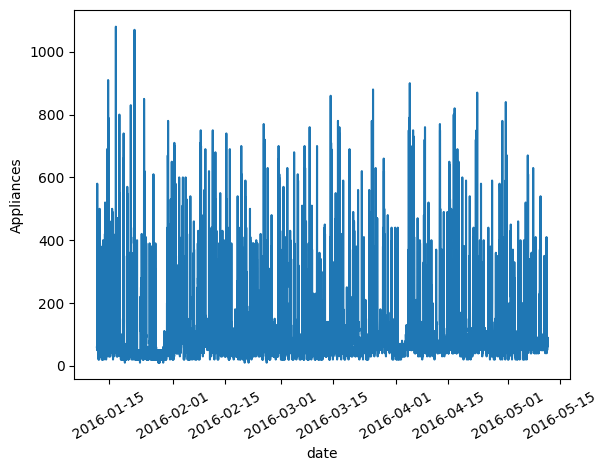

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(dat_df['date'], dat_df['Appliances'])
plt.xlabel('date')
plt.xticks(rotation=30)
plt.ylabel('Appliances')
plt.show()

In [52]:
# 훈련데이터로 3개월분을 추출
train = dat_df[dat_df['date'] < '2016-04-11 17:00:00']
print(train.shape)

# 데스트 데이터로 1개월분을 추출
test = dat_df[dat_df['date'] >= '2016-04-11 17:00:00']
print(test.shape)

(13104, 2)
(4320, 2)


In [46]:
train = pd.DataFrame(train)
test = pd.DataFrame(test)

In [53]:
# MinMaxScaler 를 로드
from sklearn.preprocessing import MinMaxScaler

# 훈련 데이터와 테스트 데이터의 범위변환
mc = MinMaxScaler()
train = mc.fit_transform(train[['Appliances']])
test = mc.fit_transform(test[['Appliances']])

In [54]:
width = 144
train = train.flatten()
train_vec = []

for i in range(len(train) - width):
  train_vec.append(train[i:i+width])

print(pd.DataFrame(train_vec).shape)
pd.DataFrame(train_vec).head()

(12960, 144)


,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
0,0.046729,0.046729,0.037383,0.037383,0.046729,0.037383,0.046729,0.046729,0.046729,0.056075,...,0.028037,0.018692,0.018692,0.018692,0.018692,0.028037,0.037383,0.028037,0.028037,0.028037
1,0.046729,0.037383,0.037383,0.046729,0.037383,0.046729,0.046729,0.046729,0.056075,0.205607,...,0.018692,0.018692,0.018692,0.018692,0.028037,0.037383,0.028037,0.028037,0.028037,0.046729
2,0.037383,0.037383,0.046729,0.037383,0.046729,0.046729,0.046729,0.056075,0.205607,0.532710,...,0.018692,0.018692,0.018692,0.028037,0.037383,0.028037,0.028037,0.028037,0.046729,0.046729
3,0.037383,0.046729,0.037383,0.046729,0.046729,0.046729,0.056075,0.205607,0.532710,0.392523,...,0.018692,0.018692,0.028037,0.037383,0.028037,0.028037,0.028037,0.046729,0.046729,0.186916
4,0.046729,0.037383,0.046729,0.046729,0.046729,0.056075,0.205607,0.532710,0.392523,0.224299,...,0.018692,0.028037,0.037383,0.028037,0.028037,0.028037,0.046729,0.046729,0.186916,0.345794


In [55]:
#
test = test.flatten()
test_vec = []

for i in range(len(test)-width):
  test_vec.append(test[i:i+width])

print(pd.DataFrame(test_vec).shape)
pd.DataFrame(test_vec).head()

(4176, 144)


,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
0,0.070588,0.070588,0.341176,0.400000,0.411765,0.129412,0.082353,0.105882,0.105882,0.094118,...,0.035294,0.047059,0.047059,0.035294,0.058824,0.047059,0.047059,0.058824,0.082353,0.435294
1,0.070588,0.341176,0.400000,0.411765,0.129412,0.082353,0.105882,0.105882,0.094118,0.094118,...,0.047059,0.047059,0.035294,0.058824,0.047059,0.047059,0.058824,0.082353,0.435294,0.235294
2,0.341176,0.400000,0.411765,0.129412,0.082353,0.105882,0.105882,0.094118,0.094118,0.082353,...,0.047059,0.035294,0.058824,0.047059,0.047059,0.058824,0.082353,0.435294,0.235294,0.129412
3,0.400000,0.411765,0.129412,0.082353,0.105882,0.105882,0.094118,0.094118,0.082353,0.129412,...,0.035294,0.058824,0.047059,0.047059,0.058824,0.082353,0.435294,0.235294,0.129412,0.529412
4,0.411765,0.129412,0.082353,0.105882,0.105882,0.094118,0.094118,0.082353,0.129412,0.141176,...,0.058824,0.047059,0.047059,0.058824,0.082353,0.435294,0.235294,0.129412,0.529412,0.705882


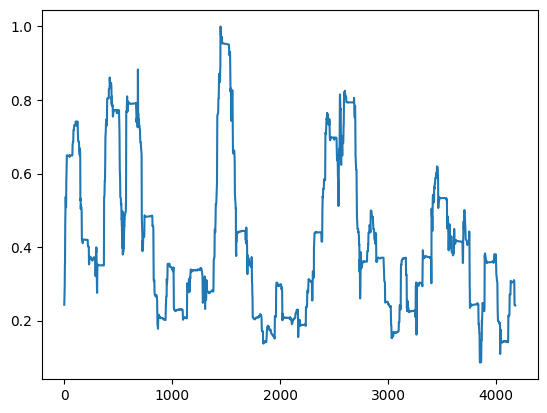

In [58]:
# 부분시계열 파형 거리 측정
from sklearn.neighbors import NearestNeighbors

train_vec = np.array(train_vec)
test_vec = np.array(test_vec)

model = NearestNeighbors(n_neighbors=1)
model.fit(train_vec)

dist, _ = model.kneighbors(test_vec)
dist = dist / np.max(dist)

plt.plot(dist)
plt.show()

경계값을 설정하여 넘어가는 곳은 이상치라고 판정할 수 있다 정상이면 0, 이상이면 1로 플르개를 설정하면 경계값이 넘어가는 곳은 1이다.

In [59]:
# 오토 인코더 구조
# 오토 인코더는 신경망 중 하나인 네트워크 형태
# 비지도학습, 차원압축 알고리즘
!pip install keras

In [60]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(144,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(144, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               18560     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 144)               18576     
                                                                 
Total params: 57904 (226.19 KB)
Trainable params: 57904 

In [61]:
# 학습 조건 설정 및 학습 실행
model.compile(loss='mse', optimizer='adam')
hist = model.fit(train_vec, train_vec, batch_size=128, verbose=1, epochs=20, validation_split=0.2)

Epoch 1/20
81/81 [==============================] - 3s 10ms/step - loss: 0.0459 - val_loss: 0.0169
Epoch 2/20
81/81 [==============================] - 0s 6ms/step - loss: 0.0168 - val_loss: 0.0169
Epoch 3/20
81/81 [==============================] - 0s 6ms/step - loss: 0.0167 - val_loss: 0.0168
Epoch 4/20
81/81 [==============================] - 0s 5ms/step - loss: 0.0166 - val_loss: 0.0162
Epoch 5/20
81/81 [==============================] - 0s 5ms/step - loss: 0.0147 - val_loss: 0.0139
Epoch 6/20
81/81 [==============================] - 0s 5ms/step - loss: 0.0110 - val_loss: 0.0086
Epoch 7/20
81/81 [==============================] - 0s 5ms/step - loss: 0.0085 - val_loss: 0.0060
Epoch 8/20
81/81 [==============================] - 0s 5ms/step - loss: 0.0071 - val_loss: 0.0056
Epoch 9/20
81/81 [==============================] - 0s 5ms/step - loss: 0.0067 - val_loss: 0.0053
Epoch 10/20
81/81 [==============================] - 0s 5ms/step - loss: 0.0062 - val_loss: 0.0050
Epoch 11/20
81/81 

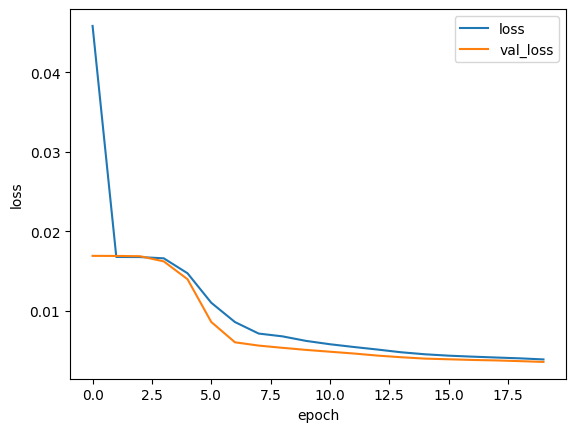

In [62]:
# 오차의 수렴 상태 확인
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

131/131 [==============================] - 1s 4ms/step


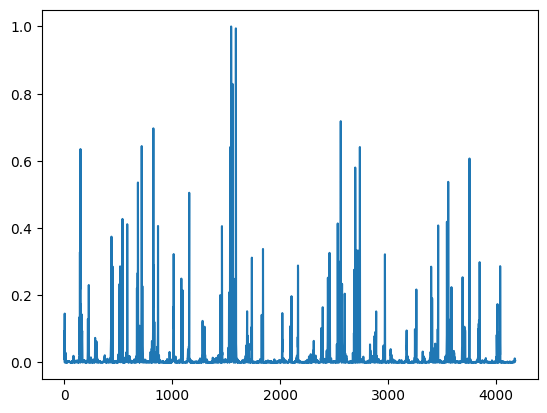

In [64]:
# 이상 스코어 계산
pred = model.predict(test_vec)
dist = test_vec[:,0] - pred[:,0]
dist = pow(dist, 2)
dist = dist / np.max(dist)

plt.plot(dist)
plt.show()